In [5]:
## Preparing the data

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from matplotlib import cm
import psychopy
from psychopy.tools.filetools import fromFile

Loading the data:

In [7]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mc2_tgT-mcBv2'
#condName = 'mc2_tgT-mcBv_peri'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName + '*'))
print dataDir
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
print allSubjDirs
stairs = pd.DataFrame()
# matrices for intensities, responses, and means of reversals:
intns, resps, thisRevs, revMeans = [],[],[],[] 
orderInfo = pd.DataFrame() # subj, session, and stair info for ordering intns & resps

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2*
['/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p0_s1_2017-02-18_0920']


In [8]:
for subjDir in allSubjDirs:
    print subjDir
    subjStairsPath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    subjStairs = pd.read_csv(subjStairsPath)
    stairs = stairs.append(subjStairs)
    #print subjStairs
    for subjStairLabel in subjStairs['stairLabel']:
        #print subjStairLabel #thisSubjStair['label']
        thisStair = fromFile(subjDir + '/' + subjStairLabel + '.psydat')
        intns.append(thisStair.intensities)
        resps.append(thisStair.data)
        theseRevIntns = thisStair.reversalIntensities #detectRevs(thisStair)
        #print np.round(theseRevIntns,1)
        revMeans.append([np.average(thisStair.reversalIntensities[-4:]),
                         np.average(thisStair.reversalIntensities[-6:]),
                         np.average(thisStair.reversalIntensities[-8:])])
        orderInfo = orderInfo.append(pd.DataFrame({
                    'participant': subjStairs.participant[0],
                    'mcBv': thisStair.extraInfo['mcBv'],
                    'targTpeak': thisStair.extraInfo['targTpeak'],
                    'targXoff2': thisStair.extraInfo['targXoff2'],
                    'targV': thisStair.extraInfo['targV'],
                    'stairStart': [thisStair.extraInfo['startContr']]
                    }))
                    #'sessionLabel': os.path.basename(subjStairsPath)[:-20],
                    #'stairLabel': [subjStairLabel]
        #print np.round(thisStair.intensities,2)
        #print thisStair.data # responses (correct/incorrect)
        #print thisStair.extraInfo

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv2/mc2_tgT-mcBv2_cent_p0_s1_2017-02-18_0920


In [9]:
stairs['condLabel'] = 'mcBv-' + stairs.mcBv.astype(str) + '_' + \
                      'tgEcc-' + stairs.targXoff2.astype(str) + '_' + \
                      'tgV-' + stairs.targV.astype(str) + '_' + \
                      'tgT-' + stairs.targTpeak.astype(str)
print stairs.shape
print stairs.columns
stairs.head(5)

(20, 29)
Index([u'expName', u'expPara', u'time', u'participant', u'dom', u'session',
       u'nRevs', u'mcSz', u'mcSf', u'mcBv', u'mcBsf', u'mcPeriGap',
       u'mcPeriFade', u'targSz', u'targSf', u'targOri1', u'targOri2',
       u'targXoff1', u'targXoff2', u'targYoff', u'targV', u'targTtot',
       u'targTpeak', u'trialT', u'fixCross', u'stairLabel', u'stairStart',
       u'meanRev6', u'condLabel'],
      dtype='object')


,expName,expPara,time,participant,dom,session,nRevs,mcSz,mcSf,mcBv,...,targYoff,targV,targTtot,targTpeak,trialT,fixCross,stairLabel,stairStart,meanRev6,condLabel
0,mc2_tgT-mcBv2,cent,2017-02-18_0920,0,1,1,12,256,0.1,0.01,...,0,0,0.66,1.66,2,1,st0_mcBv0.01_targTpeak1.66,0,0.020833,mcBv-0.01_tgEcc-28_tgV-0_tgT-1.66
1,mc2_tgT-mcBv2,cent,2017-02-18_0920,0,1,1,12,256,0.1,0.01,...,0,0,0.66,0.33,2,1,st0_mcBv0.01_targTpeak0.33,0,0.035000,mcBv-0.01_tgEcc-28_tgV-0_tgT-0.33
2,mc2_tgT-mcBv2,cent,2017-02-18_0920,0,1,1,12,256,0.1,0.01,...,0,0,0.66,1.33,2,1,st1_mcBv0.01_targTpeak1.33,1,0.020833,mcBv-0.01_tgEcc-28_tgV-0_tgT-1.33
3,mc2_tgT-mcBv2,cent,2017-02-18_0920,0,1,1,12,256,0.1,9.60,...,0,0,0.66,1.66,2,1,st0_mcBv9.6_targTpeak1.66,0,0.032500,mcBv-9.6_tgEcc-28_tgV-0_tgT-1.66
4,mc2_tgT-mcBv2,cent,2017-02-18_0920,0,1,1,12,256,0.1,0.01,...,0,0,0.66,1.33,2,1,st0_mcBv0.01_targTpeak1.33,0,0.018333,mcBv-0.01_tgEcc-28_tgV-0_tgT-1.33


In [10]:
print np.shape(resps)
print np.shape(intns)
print np.shape(revMeans)
orderInfo = orderInfo.reset_index(drop=True)
print orderInfo.shape
orderInfo.head(5)

(20,)
(20,)
(20, 3)
(20, 6)


,mcBv,participant,stairStart,targTpeak,targV,targXoff2
0,0.01,0,0,1.66,0,28
1,0.01,0,0,0.33,0,28
2,0.01,0,1,1.33,0,28
3,9.60,0,0,1.66,0,28
4,0.01,0,0,1.33,0,28


Combining the trial data into a tall df.

In [35]:
nStairs = np.shape(resps)[0]
nTrials = []
for thisResp in resps: nTrials.append(np.shape(thisResp)[0])
nTrialsMax = np.max(nTrials)
allResps, allIntns = [], []
for i in range(nStairs):
    thisResp, thisIntn = resps[i], intns[i]
    x, y = np.empty((nTrialsMax,)), np.empty((nTrialsMax,))
    x[:], y[:] = np.NAN, np.NAN
    x[0:nTrials[i]] = np.array(thisResp)
    y[0:nTrials[i]] = np.array(thisIntn)
    allResps.append(x)
    allIntns.append(y)
orderInfoRepd = orderInfo.loc[np.repeat(orderInfo.index.values,nTrialsMax)]
print orderInfoRepd.shape
orderInfoRepd = orderInfoRepd.reset_index(drop=True)
orderInfoRepd['trialN'] = np.tile(np.linspace(1,nTrialsMax,nTrialsMax),nStairs)
orderInfoRepd['intns'] = np.array(allIntns).flatten()
orderInfoRepd['resps'] = np.array(allResps).flatten()
trials = pd.merge(orderInfoRepd, stairs, on=['participant','mcBv','targTpeak',
                                             'targXoff2', 'targV', 'stairStart'])
trials['logIntn'] = np.log10(trials.intns)
trials.ix[trials.intns<=0.001,'logIntn'] = np.nan
trials.head(5)

(560, 6)


/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:22: RuntimeWarning: divide by zero encountered in log10


,mcBv,participant,stairStart,targTpeak,targV,targXoff2,trialN,intns,resps,expName,...,targOri2,targXoff1,targYoff,targTtot,trialT,fixCross,stairLabel,meanRev6,condLabel,logIntn
0,0.01,0,0,1.66,0,28,1.0,0.0,0.0,mc2_tgT-mcBv2,...,0,-28,0,0.66,2,1,st0_mcBv0.01_targTpeak1.66,0.020833,mcBv-0.01_tgEcc-28_tgV-0_tgT-1.66,NaN
1,0.01,0,0,1.66,0,28,2.0,0.2,1.0,mc2_tgT-mcBv2,...,0,-28,0,0.66,2,1,st0_mcBv0.01_targTpeak1.66,0.020833,mcBv-0.01_tgEcc-28_tgV-0_tgT-1.66,-0.69897
2,0.01,0,0,1.66,0,28,3.0,0.0,0.0,mc2_tgT-mcBv2,...,0,-28,0,0.66,2,1,st0_mcBv0.01_targTpeak1.66,0.020833,mcBv-0.01_tgEcc-28_tgV-0_tgT-1.66,NaN
3,0.01,0,0,1.66,0,28,4.0,0.1,1.0,mc2_tgT-mcBv2,...,0,-28,0,0.66,2,1,st0_mcBv0.01_targTpeak1.66,0.020833,mcBv-0.01_tgEcc-28_tgV-0_tgT-1.66,-1.00000
4,0.01,0,0,1.66,0,28,5.0,0.0,0.0,mc2_tgT-mcBv2,...,0,-28,0,0.66,2,1,st0_mcBv0.01_targTpeak1.66,0.020833,mcBv-0.01_tgEcc-28_tgV-0_tgT-1.66,NaN


In [36]:
dfStatCent = trials.ix[(trials.targXoff2<50) & (trials.targV==0)]
dfStatPeri = trials.ix[(trials.targXoff2>50) & (trials.targV==0)]

(-3.1, 0)

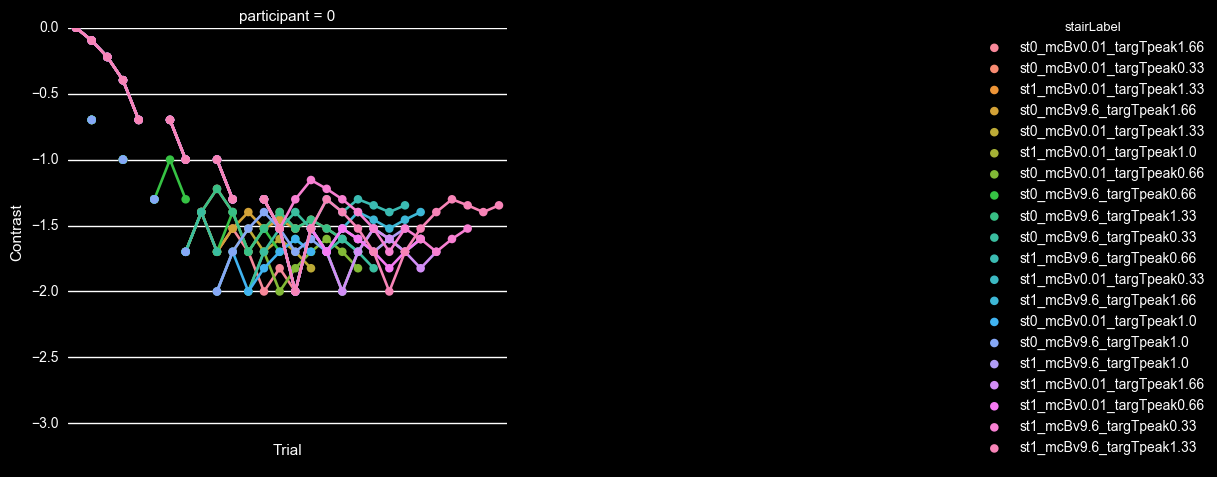

In [37]:
g = sns.factorplot(x='trialN', y='logIntn', hue='stairLabel', col='participant', data=dfStatCent, 
               col_wrap=2, ci=None, kind='point', size=5, scale=.6)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
plt.ylim(-3.1,0)

In [17]:
g = sns.factorplot(x='trialN', y='intns', hue='stairLabel', col='participant', data=dfStatPeri, 
               col_wrap=2, ci=None, kind='point', size=5, scale=.6)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
#plt.ylim(-0.1,1.1)

ValueError: min() arg is an empty sequence